In [20]:
from astropy.io import fits
from astropy.table import Table
img = fits.open('spec-57407-KP062035N253629V01_sp04-227.fits')
img.info()


Filename: spec-57407-KP062035N253629V01_sp04-227.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Flux          1 PrimaryHDU     126   (3909, 5)   float32   


<Table length=5>
    col0          col1          col2     ... col3906  col3907 col3908 
  float32       float32       float32    ... float32  float32 float32 
------------ ------------- ------------- ... -------- ------- --------
   41875.688     42587.176      42882.72 ...      0.0     0.0      0.0
1.002703e-05 1.0186371e-05 1.0344004e-05 ...      0.0     0.0      0.0
   3699.9863     3700.8384     3701.6907 ... 9094.945 9097.04 9099.135
         0.0           0.0           0.0 ...      0.0     0.0      0.0
         0.0           0.0           0.0 ...      0.0     0.0      0.0

Filename: spec-56945-HD031350N514705V01_sp12-196.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Flux          1 PrimaryHDU     126   (3909, 5)   float32   
     col0         col1        col2   ...   col3906     col3907      col3908   
------------- ------------ --------- ... ----------- ------------ ------------
    4783.9033    4593.3604  4757.453 ...   2334.4001      2342.34     2308.147
3.1852526e-06 3.243312e-06       0.0 ... 0.004159685 0.0042360113 0.0042958427
    3699.9863    3700.8384 3701.6907 ...    9094.945      9097.04     9099.135
          0.0          0.0       0.0 ...         0.0          0.0          0.0
          0.0          0.0       0.0 ...         0.0          0.0          0.0
Flux:
   col0     col1     col2     col3   ...  col3605   col3606  col3607 col3608 
--------- -------- -------- -------- ... --------- --------- ------- --------
5666.0117 5570.725 5238.156 4880.575 ... 2301.5579 2334.4001 2342.34 2308.147
Wavelength:
   col0      c

/home/luciferat02/.local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/luciferat02/.local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/luciferat02/.local/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


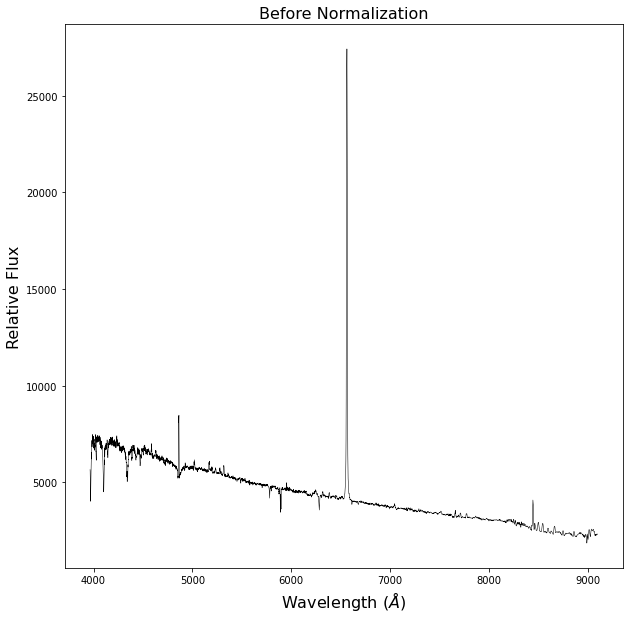

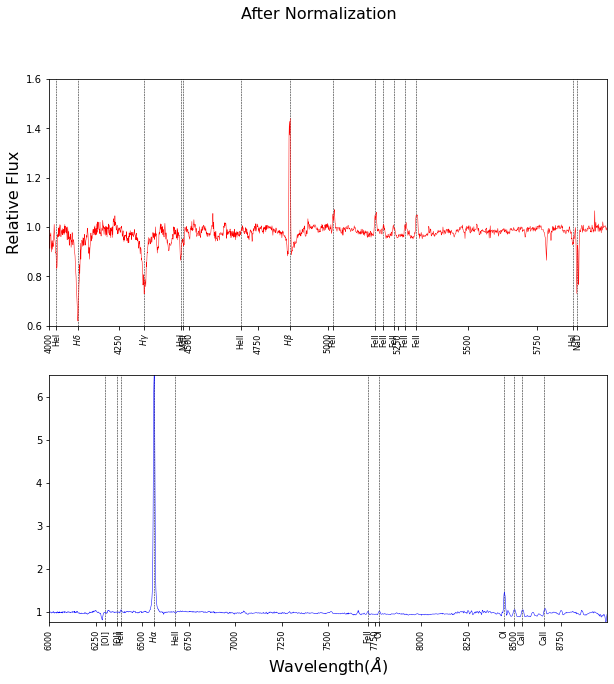

In [23]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import lmfit
import os
import laspec
from laspec import line_index
import matplotlib.backends.backend_pdf as pdf
from laspec import normalization
pdff = pdf.PdfPages("Normalised_spec_all_NEW.pdf")
hdu = fits.open('spec-56945-HD031350N514705V01_sp12-196.fits')
hdu.info()
spectra = hdu[0].data
print(Table(spectra))
flux = spectra[0]
wavelength = spectra[2]
f1 = flux[300:4200]
w1 = wavelength[300:4200]
print("Flux:")
print(Table(f1))
print("Wavelength:")
print(Table(w1))
plt.plot(w1,f1, color = 'k', linewidth = 0.5)
plt.xlabel('Wavelength ($\AA$)',fontsize=16)
plt.ylabel('Relative Flux',fontsize=16)
plt.title('Before Normalization',fontsize=16)
plt.rcParams["figure.figsize"] = (15, 15)
plt.savefig('MYGRAPH_nonorm.jpeg')
a= normalization.normalize_spectrum_general(w1,f1, p=1e-6, q=0.8,niter=100)
a = np.array([a])

fig, axes = plt.subplots(2,1)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.suptitle('After Normalization', fontsize=16)
axes[1].set_xlabel('Wavelength($\AA$)',fontsize=16)
axes[0].set_ylabel('Relative Flux', fontsize=16)
axes[0].set_xlim(4000,6000)
axes[0].set_ylim(0.6,1.6)
axes[1].set_xlim(6000,9000)
axes[1].set_ylim(0.75,6.5)

feii = [4026,4102,4341,4471,4481,4862,5018,5169,5198,5235,5276,5316,5876,5893,4686,6300,6363,6384,6563,7712,7774,8446,8498,8542,8662,6678]
for val in list(feii):
    if val<6000:
        axes[0].axvline(x=val,color='k',linestyle='--',linewidth=0.5,label='H beta lineat 4862$\AA$')
    else:
        axes[1].axvline(x=val,color='k',linestyle='--',linewidth=0.5,label='H beta lineat 4862$\AA$')
#LABELLING THE IMPORTANT EMISSION LINES
xticks1 = [4026,4102,4341,4471,4481,4862,5018,5169,5198,5235,5276,5316,5876,5893,4686]
x1_labels = ['HeI',r'$H\delta$',r'$H\gamma$','HeI','MgII',r'$H\beta$','FeII','FeII','FeII','FeII','FeII','FeII','HeI','NaD','HeII']
xticks2 = [6300,6363,6384,6563,7712,7774,8446,8542,8662,6678]
x2_labels = ['[OI]','[OI]','FeII',r'$H\alpha$','FeII','OI','OI','CaII','CaII','HeII']
xticks3 = np.arange(4000,6000,250)
xticks4 = np.arange(6000,9000,250)

#SETTING X-TICKS AND PLOTTING
for i in [0]:
    axes[i].set_xticks(list(xticks1)+list(xticks3),minor=False)	
    axes[i].set_xticklabels(x1_labels+list(xticks3))
    plt.setp(axes[i].get_xticklabels(), fontsize=8,rotation=90)
for i in [1]:
    axes[i].set_xticks(list(xticks2)+list(xticks4),minor=False)	
    axes[i].set_xticklabels(x2_labels+list(xticks4))
    plt.setp(axes[i].get_xticklabels(), fontsize=8,rotation=90)


axes[0].plot(w1, a[0][0], color = 'r', linewidth = 0.5)
axes[1].plot(w1,a[0][0], color = 'b', linewidth = 0.5)
fig.savefig('MYGRAPH_norm.jpeg')
pdff.savefig(fig)

pdff.close()

In [42]:
#Finding EW of all absorption and emission spectral lines:
from laspec import line_index
import numpy as np
from prettytable import PrettyTable
wav = np.array([],ndmin=len(feii))
ran1 = np.array([],ndmin=len(feii))
ran2 = np.array([],ndmin=len(feii))
ewid = np.array([],ndmin=len(feii))
myTable = PrettyTable(["Line Width", "Range_min", "Range_max", "EW","Type of line"])
for wl in feii:
    line_info_dict = {'line_center': wl,
                      'line_range': (wl-5,wl+5),
                      'line_shoulder_left': (wl-10,wl-5),
                      'line_shoulder_right': (wl+5,wl+10)}
    EW = line_index.measure_line_index(w1,f1,flux_err=None, mask=None, 
                                   z=None, line_info = line_info_dict, num_refit=(100, None), 
                                   filepath=None, return_type='dict', verbose=False)
    if EW['EW_int']>0:
        myTable.add_row([wl, wl-5, wl+5, EW['EW_int'],"Absorption Line"])
    else:
        myTable.add_row([wl, wl-5, wl+5, EW['EW_int'],"Emission Line"])
     
    
print(myTable)

+------------+-----------+-----------+--------------+-----------------+
| Line Width | Range_min | Range_max |      EW      |   Type of line  |
+------------+-----------+-----------+--------------+-----------------+
|    4026    |    4021   |    4031   |  0.8663623   | Absorption Line |
|    4102    |    4097   |    4107   |  1.7897097   | Absorption Line |
|    4341    |    4336   |    4346   |  0.81091875  | Absorption Line |
|    4471    |    4466   |    4476   |  0.5268438   | Absorption Line |
|    4481    |    4476   |    4486   | -0.011549864 |  Emission Line  |
|    4862    |    4857   |    4867   |  -3.8817666  |  Emission Line  |
|    5018    |    5013   |    5023   |  -0.2735095  |  Emission Line  |
|    5169    |    5164   |    5174   |  -0.5608679  |  Emission Line  |
|    5198    |    5193   |    5203   | -0.21202259  |  Emission Line  |
|    5235    |    5230   |    5240   | -0.23292805  |  Emission Line  |
|    5276    |    5271   |    5281   | -0.26678333  |  Emission 